In [848]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "heart-health-stats-dataset"

# **Import**

In [849]:
library(ggplot2)
library(dplyr)
library(psych)
library(corrplot)
library(ggcorrplot)
library(stringr)

# **1. Data Import & Structure**

In [850]:
data <- read.csv('/kaggle/input/heart-health-stats-dataset/Heart_health.csv')

* **ID : Unique identifier for each individual**
* **Name : Name of the individual**
* **Age : Age of the individual (in years)**
* **Gender : Gender of the individual (Male/Female)**
* **Height(cm) : Height of the individual (in centimeters)**
* **Weight(kg) : Weight of the individual (in kilograms)**
* **Blood Pressure(mmHg) : Blood pressure readings of the individual**
* **Cholesterol(mg/dL): Cholesterol level of the individual (in mg/dL)**
* **Glucose(mg/dL) : glucose level of the individual**
* **Smoker : Smoker or Not**
* **Exercise(hours/week) : Number of hours person exercise**
* **Heart Attack : Risk of heart attack or not**

In [851]:
str(data)

'data.frame':	724 obs. of  12 variables:
 $ ID                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name                : chr  "John Doe" "Jane Smith" "Michael Johnson" "Sarah Brown" ...
 $ Age                 : int  45 35 55 40 50 30 60 38 48 42 ...
 $ Gender              : chr  "Male" "Female" "Male" "Female" ...
 $ Height.cm.          : int  175 160 180 165 170 155 175 162 178 168 ...
 $ Weight.kg.          : int  80 65 85 70 75 60 82 68 78 72 ...
 $ Blood.Pressure.mmHg.: chr  "120/80" "110/70" "130/85" "115/75" ...
 $ Cholesterol.mg.dL.  : int  200 180 220 190 210 170 230 195 205 200 ...
 $ Glucose.mg.dL.      : int  90 80 95 85 92 75 98 88 94 90 ...
 $ Smoker              : chr  "No" "No" "Yes" "No" ...
 $ Exercise.hours.week.: int  3 2 4 3 2 1 3 2 4 3 ...
 $ Heart.Attack        : int  0 0 1 0 1 0 1 0 1 0 ...


In [852]:
dim(data)

[1] 724  12

In [853]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,724,361.7127072,207.9016094,362.5,362.5000000,268.3506,1,714,713,-0.01709158,-1.22220475,7.72660246
Name*,2,724,62.7002762,34.5352058,61.5,62.6655172,43.7367,1,121,120,0.01980831,-1.30038323,1.28349082
Age,3,724,44.8425414,8.1624287,44.0,44.9310345,8.8956,30,60,30,0.01263101,-1.09453358,0.30335427
Gender*,4,724,1.5000000,0.5003457,1.5,1.5000000,0.7413,1,2,1,0.00000000,-2.00276052,0.01859520
Height.cm.,5,724,171.1616022,6.2420176,170.0,171.1344828,5.9304,155,183,28,0.10569484,-0.64717639,0.23198276
Weight.kg.,6,724,75.6104972,6.3685952,75.0,75.5758621,7.4130,60,89,29,0.02281301,-0.83314604,0.23668698
Blood.Pressure.mmHg.*,7,724,22.9779006,8.2778217,24.0,23.5224138,10.3782,1,40,39,-0.39214884,-0.60163018,0.30764282
Cholesterol.mg.dL.,8,724,206.0220994,11.2247039,210.0,206.2413793,14.8260,170,230,60,-0.29357302,-0.08448158,0.41716284
Glucose.mg.dL.,9,724,92.1795580,4.6627118,92.0,92.2517241,5.9304,75,100,25,-0.50818816,0.61471680,0.17328832


**Missing Value Check**

In [854]:
colSums(is.na(data))

ID                 Name                  Age 
                   0                    0                    0 
              Gender           Height.cm.           Weight.kg. 
                   0                    0                    0 
Blood.Pressure.mmHg.   Cholesterol.mg.dL.       Glucose.mg.dL. 
                   0                    0                    0 
              Smoker Exercise.hours.week.         Heart.Attack 
                   0                    0                    0

**Duplicated Value Check**

In [855]:
table(duplicated(data))


FALSE  TRUE 
  714    10 

**Data Check**

In [856]:
head(data)

,ID,Name,Age,Gender,Height.cm.,Weight.kg.,Blood.Pressure.mmHg.,Cholesterol.mg.dL.,Glucose.mg.dL.,Smoker,Exercise.hours.week.,Heart.Attack
,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>
1,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
2,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
3,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
4,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
5,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1
6,6,Emily Davis,30,Female,155,60,105/65,170,75,No,1,0


# **2. Data Transform**

**Remove duplicated value**

In [857]:
data <- unique(data)

**Split Blood.Pressure.mmHg**

In [858]:
bp_split <- str_split(data$Blood.Pressure.mmHg.,"/")

bp_split_1 <- c()
bp_split_2 <- c()

for (i in 1:length(bp_split)){
    bp_split_1[i] <- bp_split[[i]][1]
    bp_split_2[i] <- bp_split[[i]][2]
}


data$MaxBP <- as.integer(bp_split_1)
data$MinBP <- as.integer(bp_split_2)

In [859]:
# Gender : Male -> 1 , Female -> 0
data$Gender <- ifelse(data$Gender == 'Male' , 1 ,
                     ifelse(data$Gender == 'Female', 0 , 2))

# Cholesterol : No -> 0 , Yes -> 1
data$Smoker <- ifelse(data$Smoker == 'No',0,
                                ifelse(data$Smoker == 'Yes',1,2))

In [860]:
data <- data[,-c(1:2,7)]

In [861]:
names(data) <- c('Age','Gender','Height','Weight','Cholesterol','Glucose','Smoker','ExerciseTime','HeartAttack','MaxBP','MinBP')

In [862]:
head(data)

,Age,Gender,Height,Weight,Cholesterol,Glucose,Smoker,ExerciseTime,HeartAttack,MaxBP,MinBP
,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,45,1,175,80,200,90,0,3,0,120,80
2,35,0,160,65,180,80,0,2,0,110,70
3,55,1,180,85,220,95,1,4,1,130,85
4,40,0,165,70,190,85,0,3,0,115,75
5,50,1,170,75,210,92,1,2,1,125,80
6,30,0,155,60,170,75,0,1,0,105,65


# **3. Data Visualization**

In [863]:
num_cols <- c('Age','Height','Weight','MaxBP','MinBP','Cholesterol','Glucose')

**Histogram**

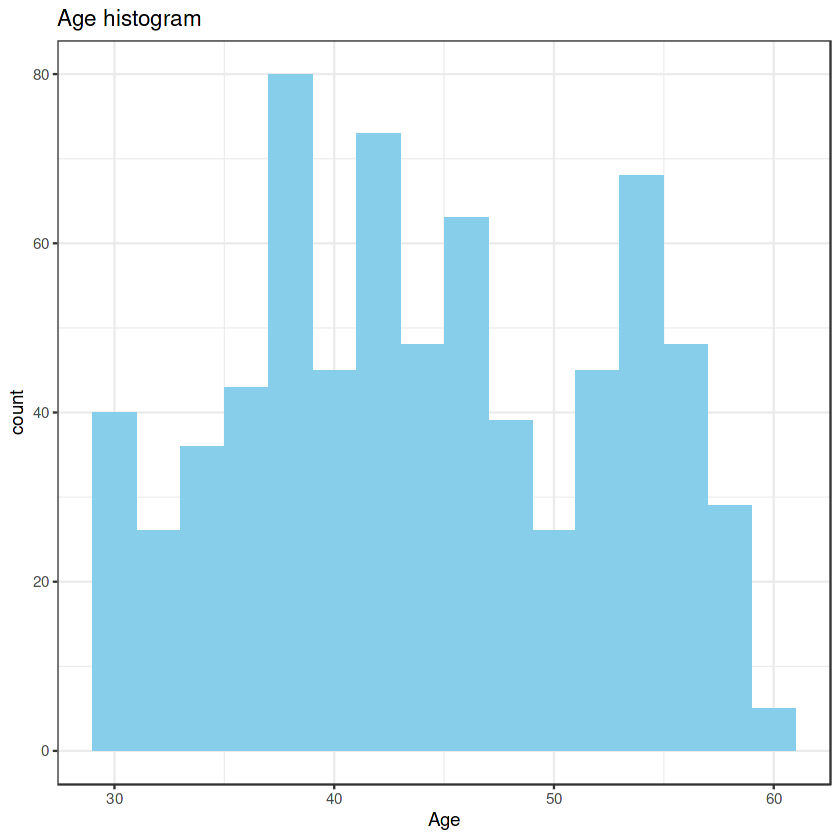

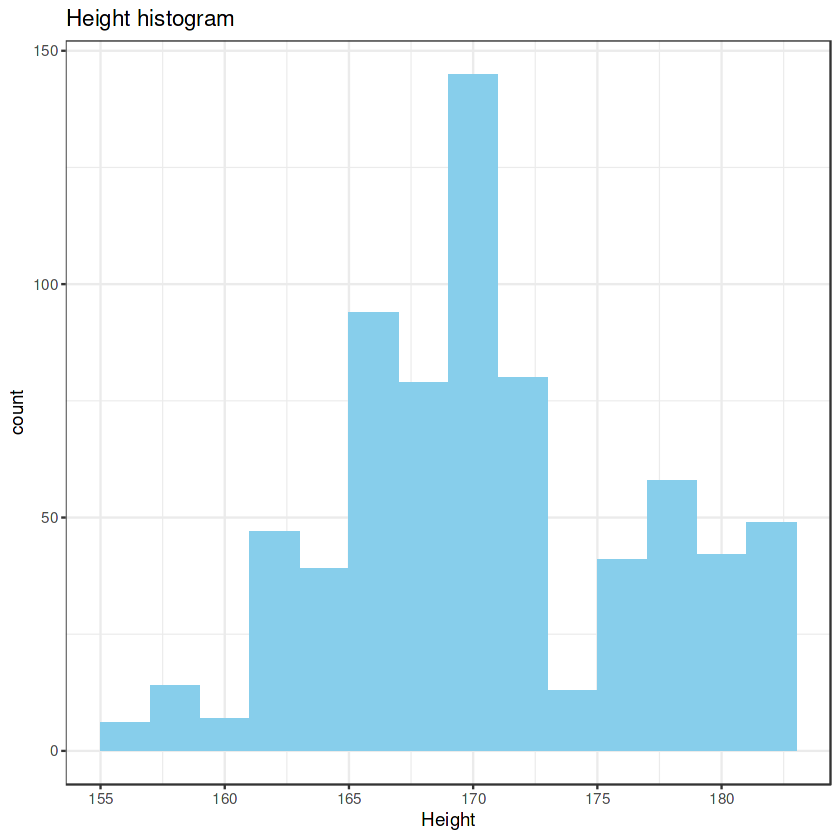

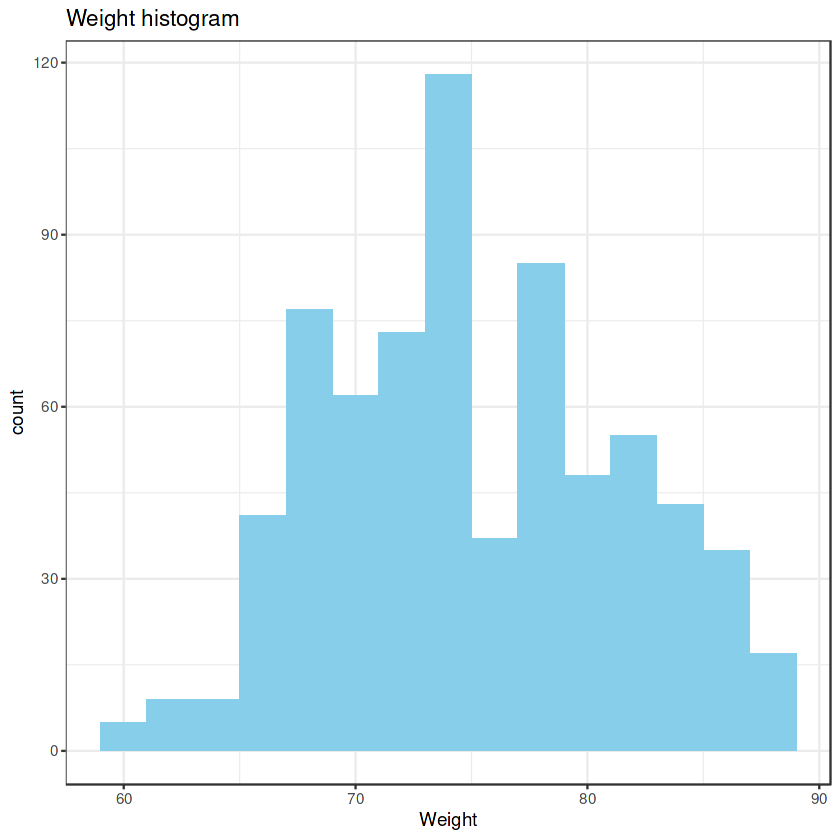

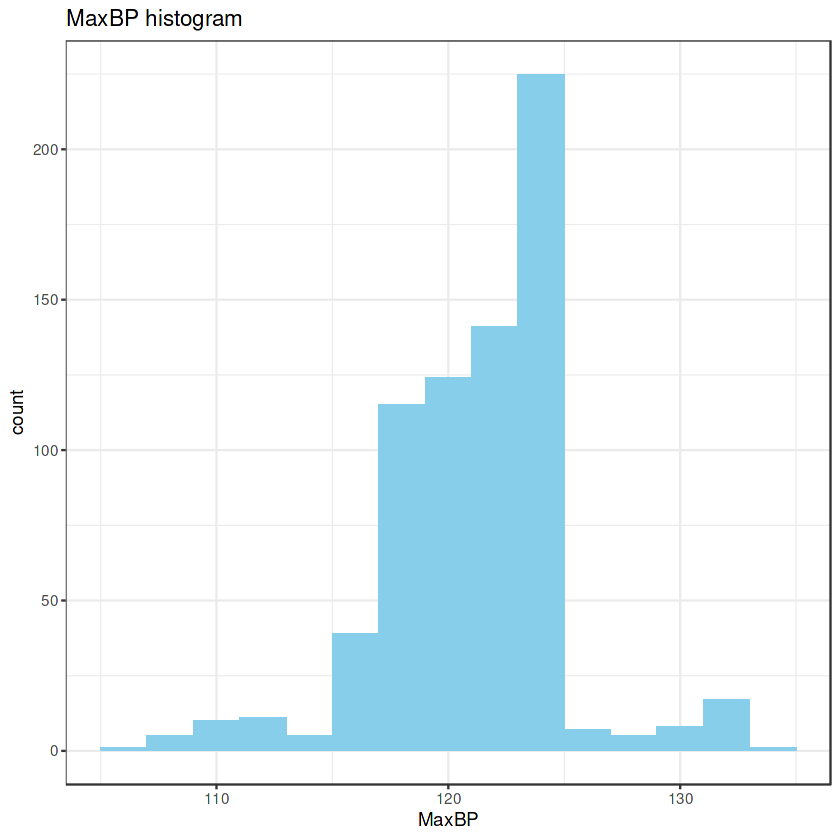

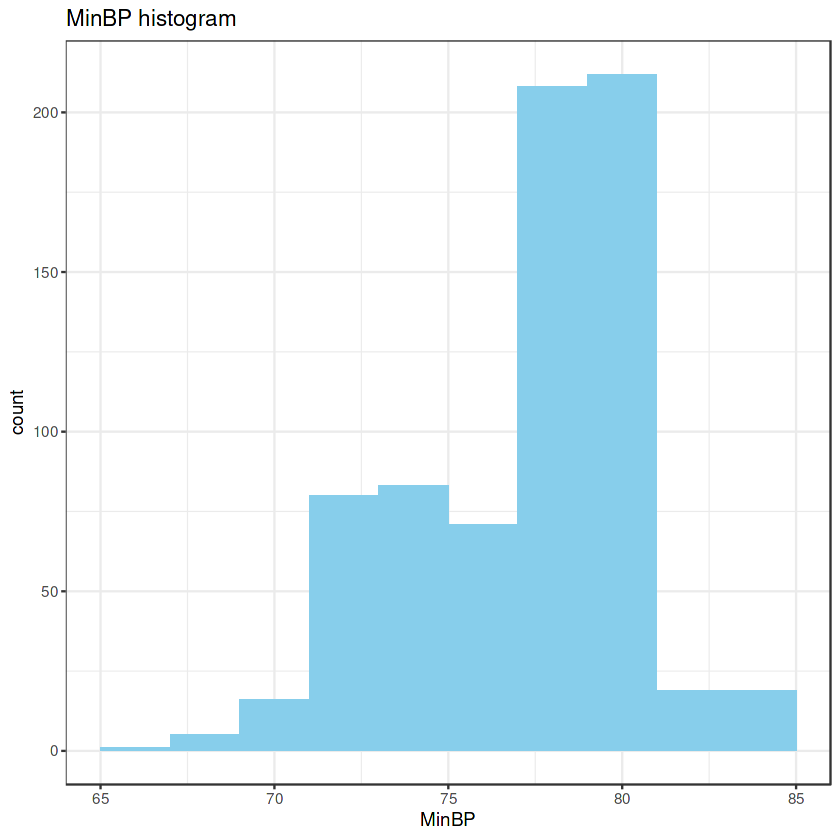

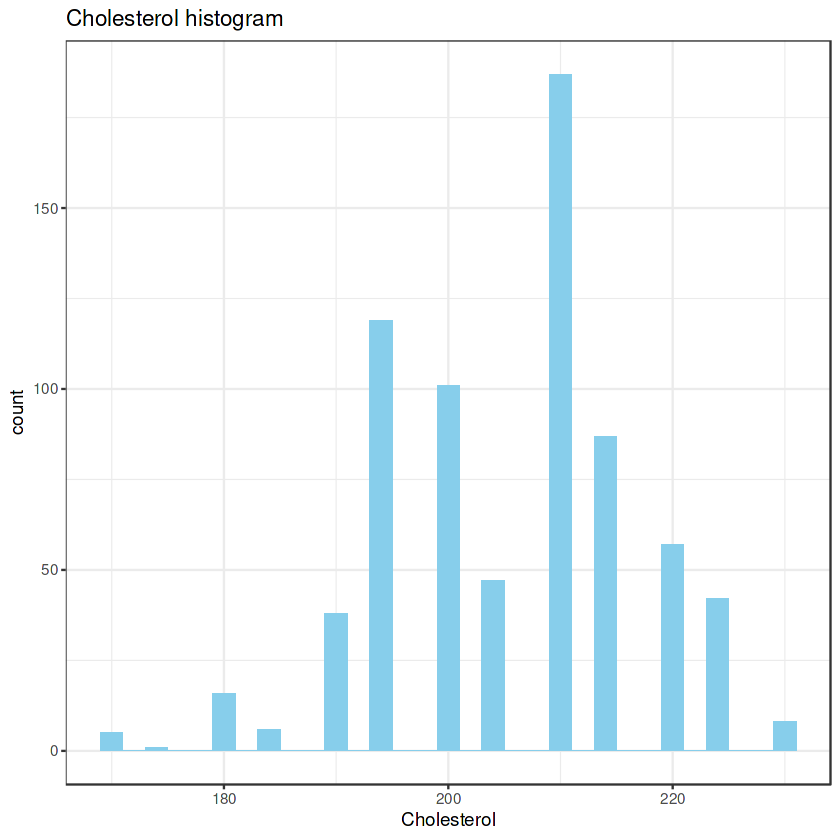

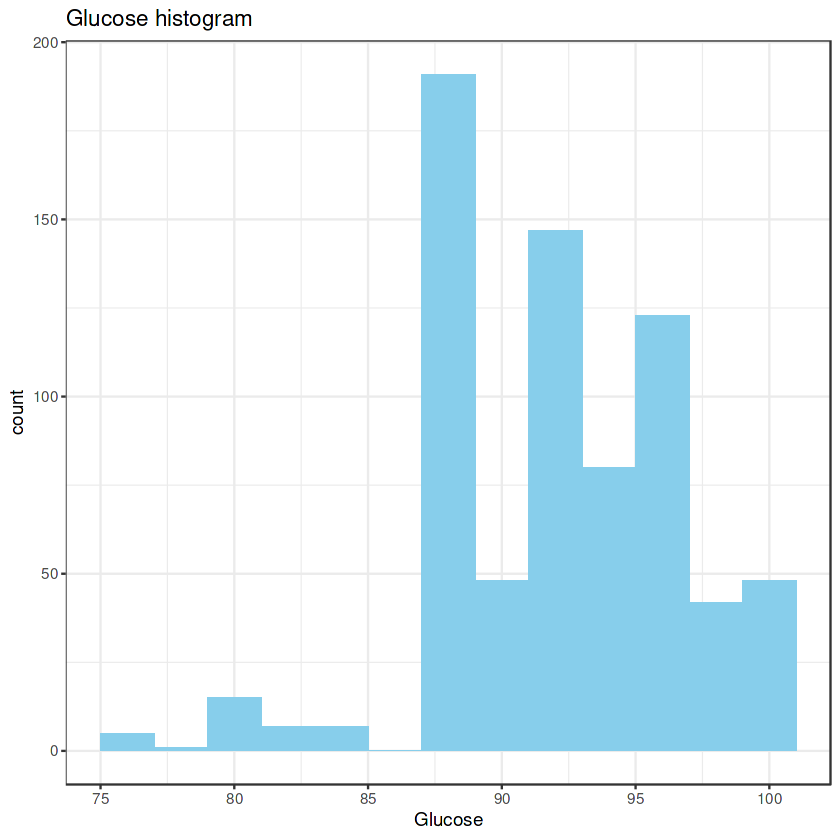

In [864]:
for (i in num_cols){
    print(ggplot(data, aes(x= data[,i])) + geom_histogram(fill = 'skyblue', binwidth = 2) + xlab(i) + theme_bw() + ggtitle(paste0(i, ' histogram')))
}

--------------

**Boxplot by Gender**

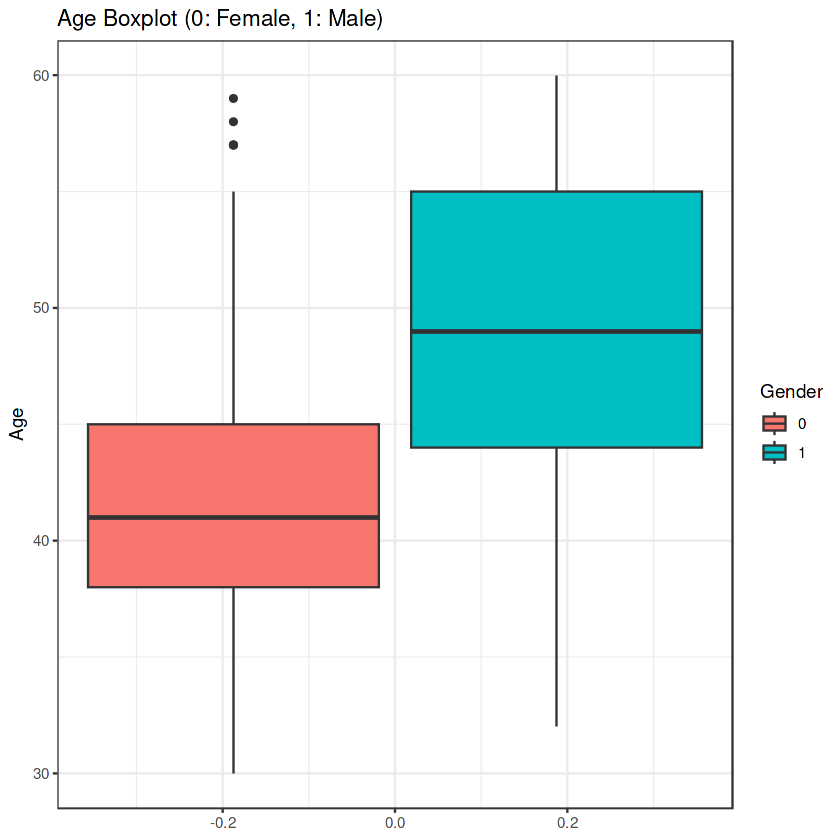

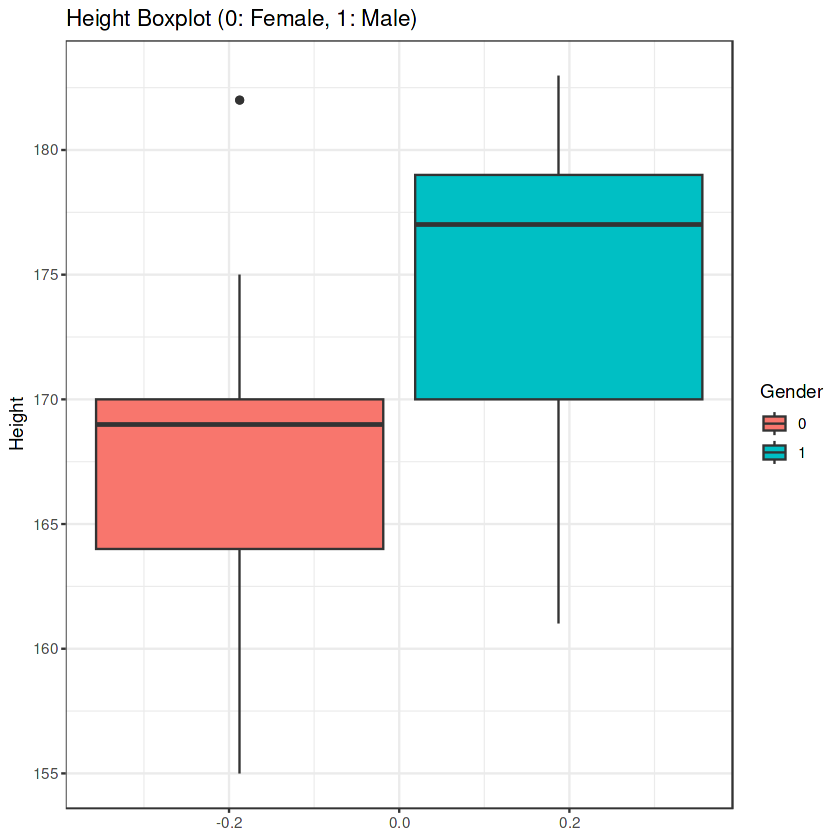

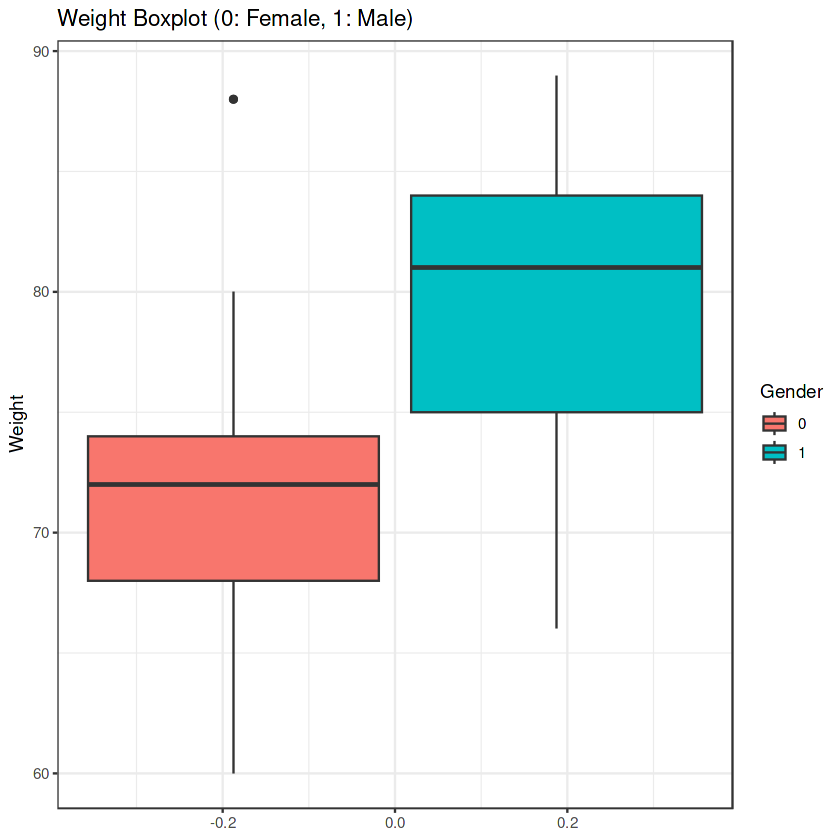

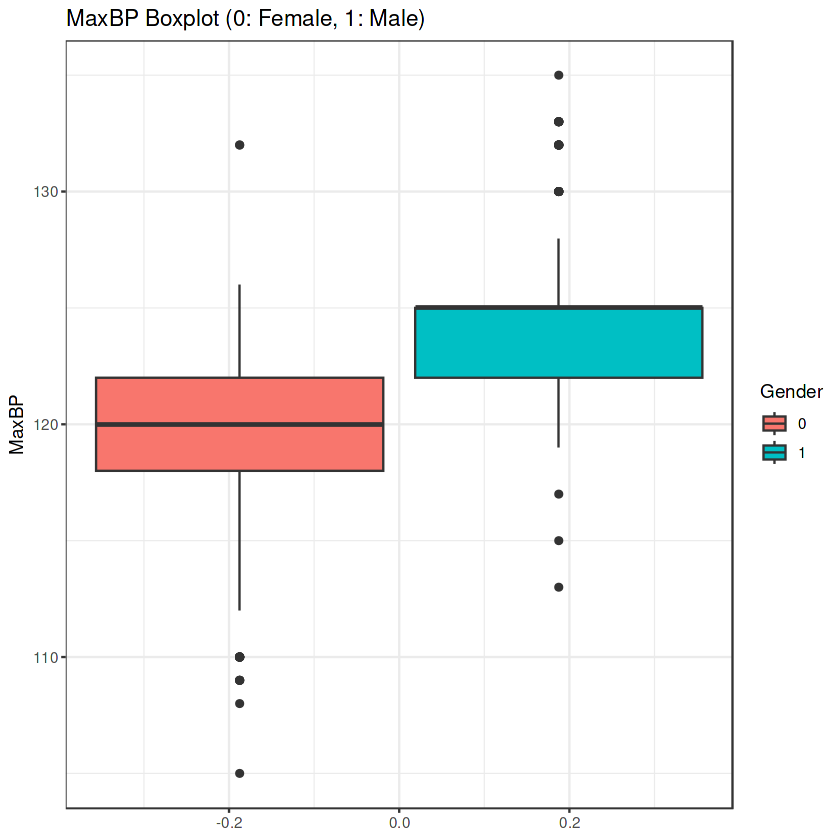

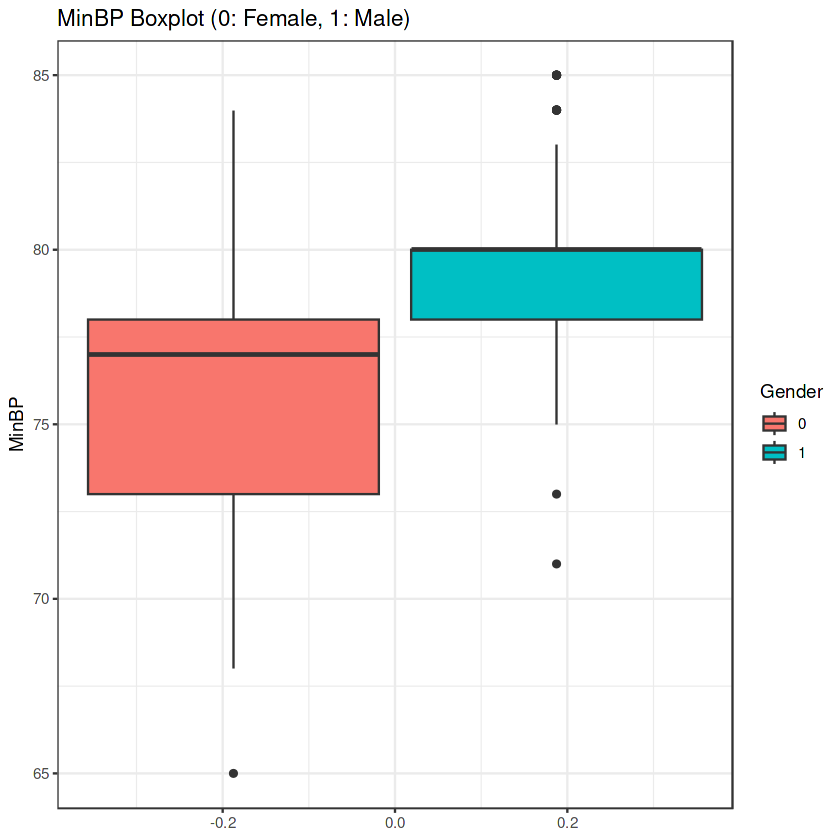

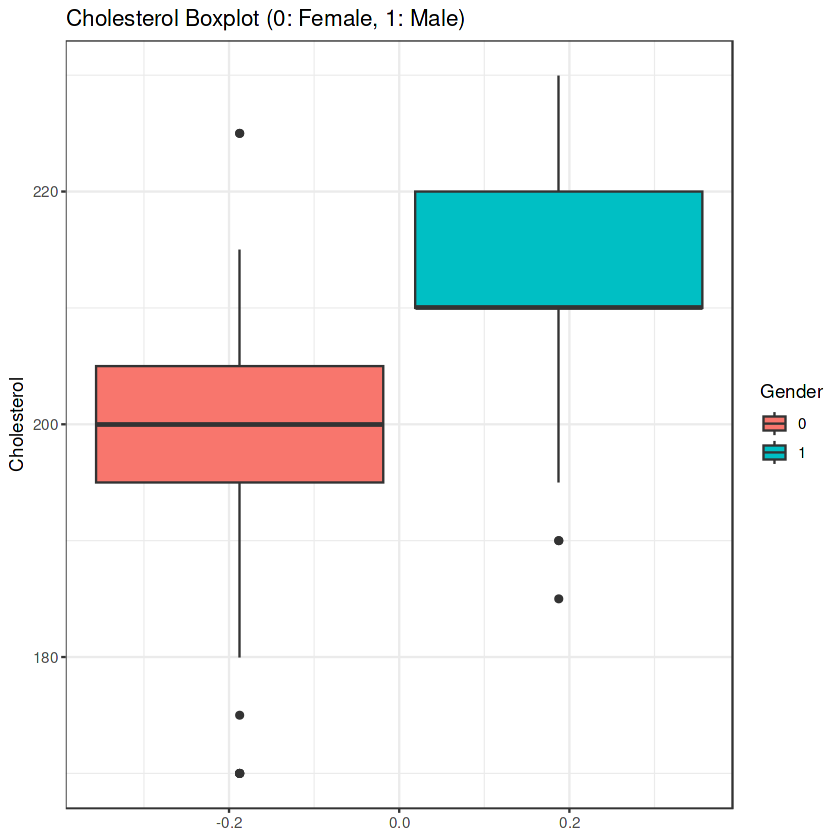

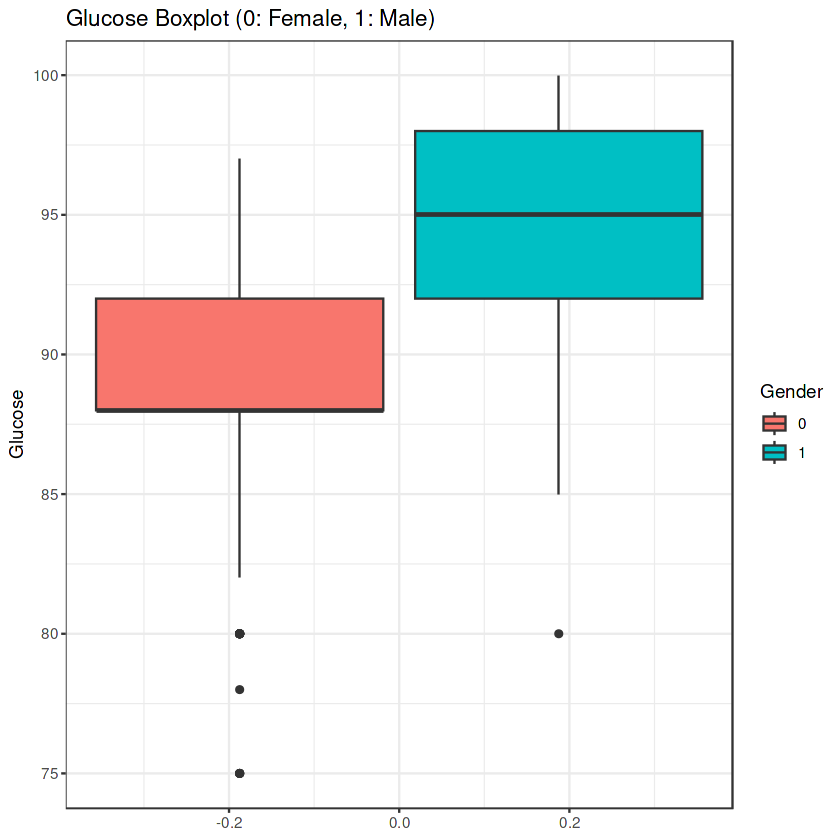

In [865]:
for (i in num_cols){
    print(ggplot(data, aes(y= data[,i], fill = factor(Gender))) + geom_boxplot() + ylab(i) + theme_bw() +
          ggtitle(paste0(i, ' Boxplot (0: Female, 1: Male)')) + labs(fill = 'Gender'))
}

-----------

**Boxplot by Smoker**

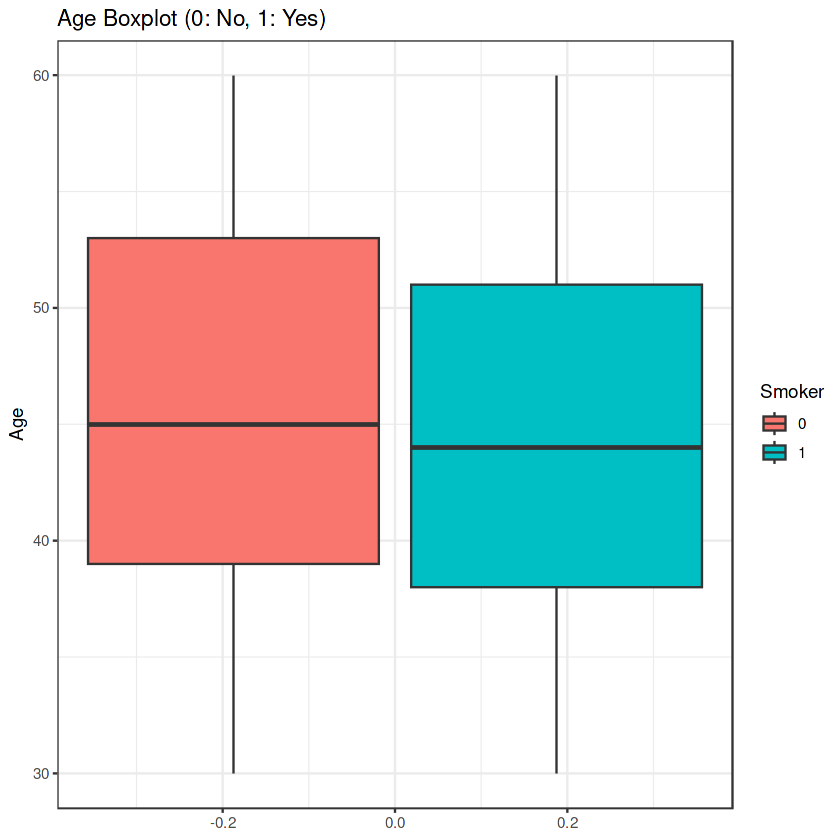

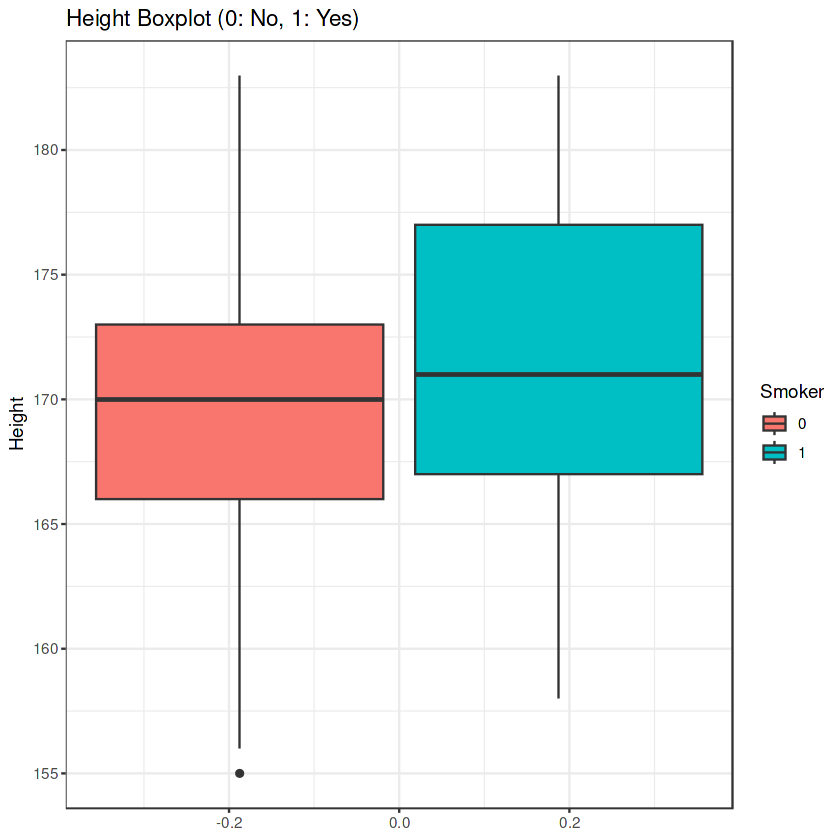

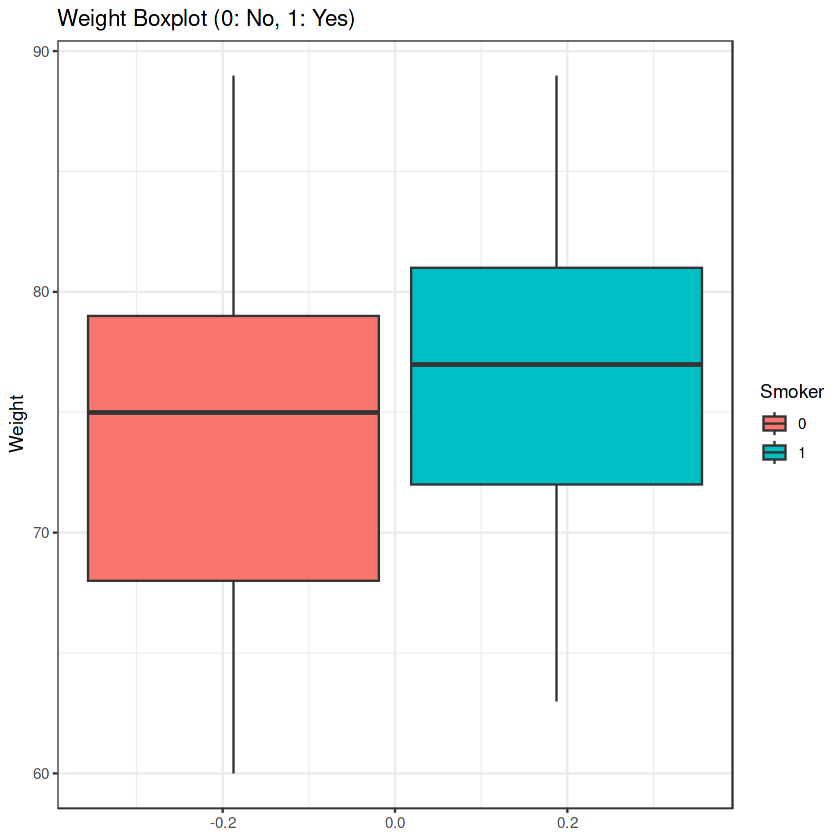

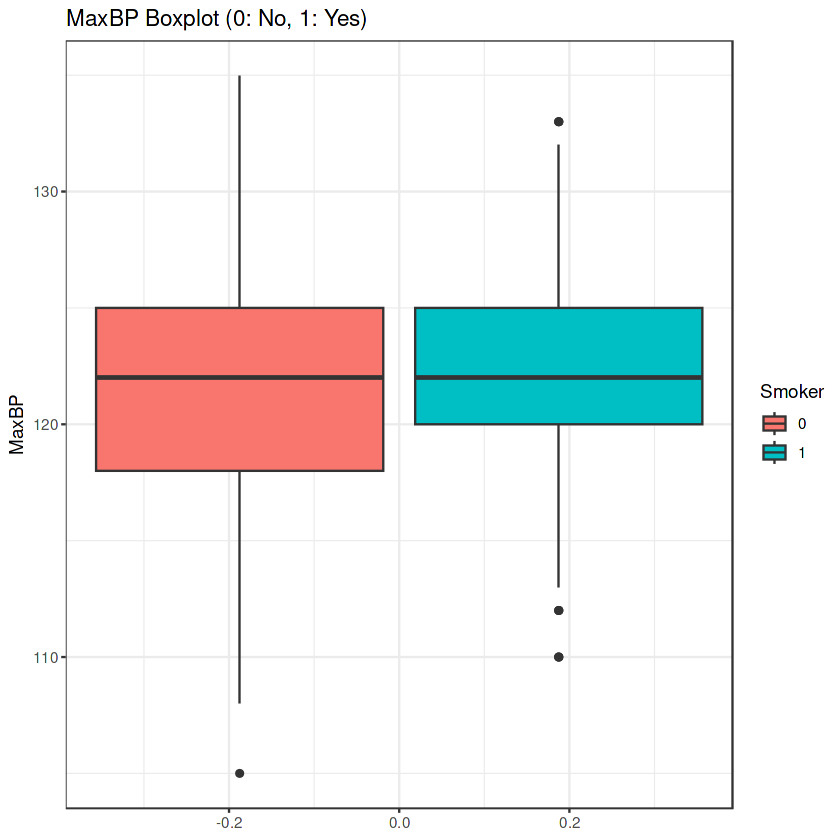

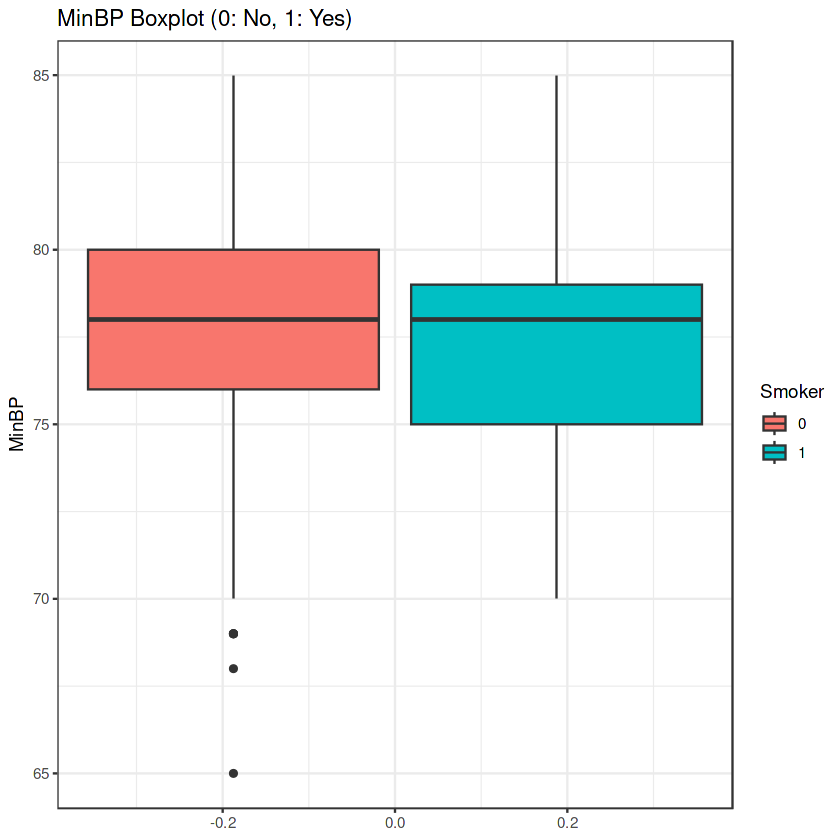

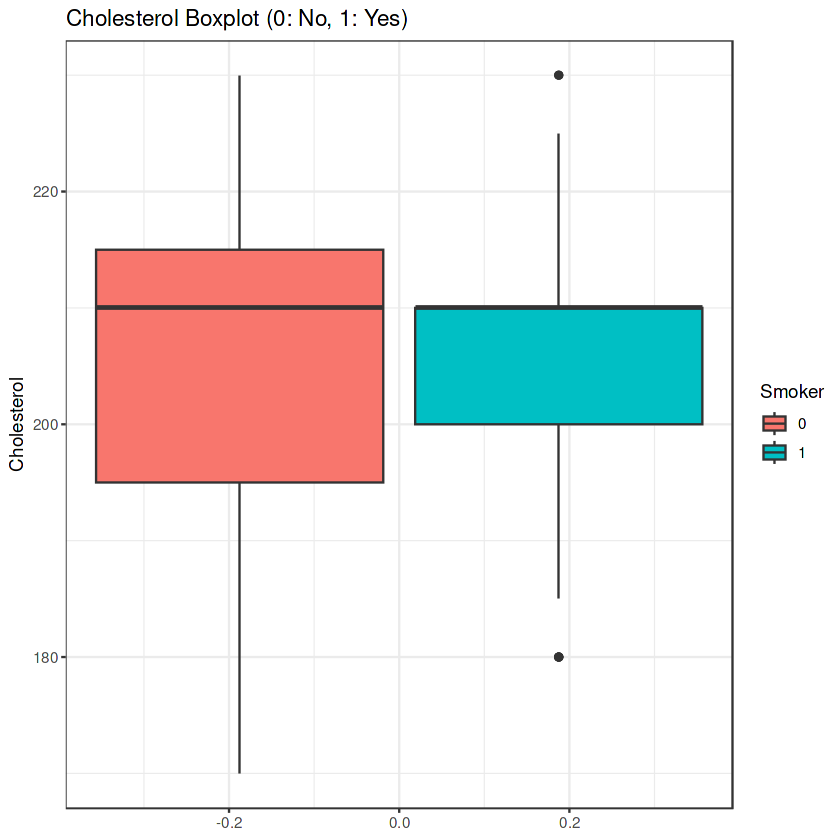

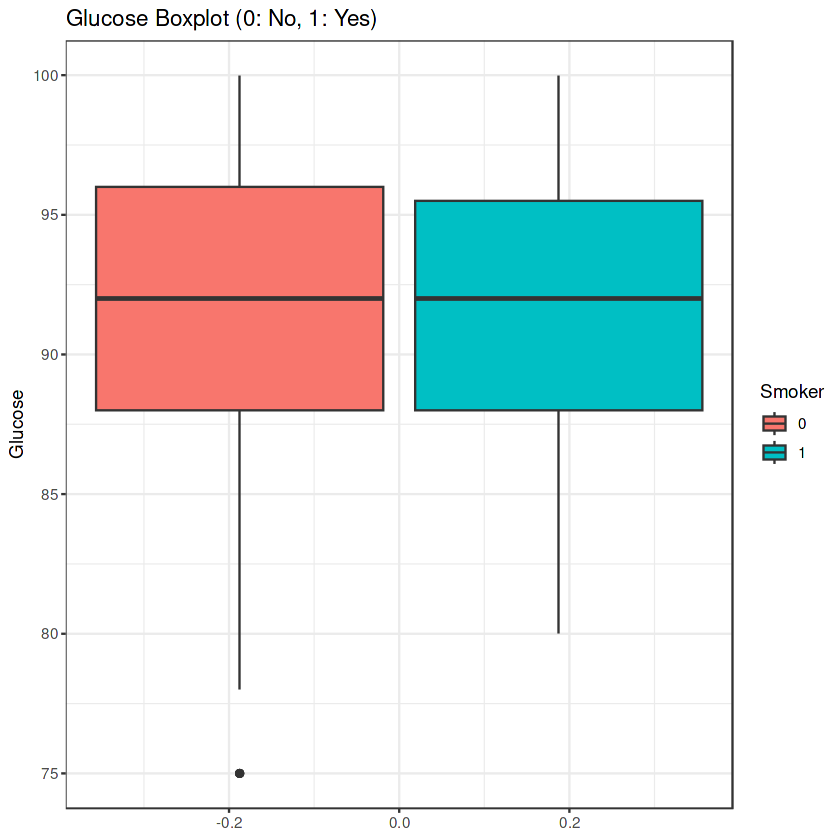

In [866]:
for (i in num_cols){
    print(ggplot(data, aes(y= data[,i], fill = factor(Smoker))) + geom_boxplot() + ylab(i) + theme_bw() +
          ggtitle(paste0(i, ' Boxplot (0: No, 1: Yes)')) + labs(fill = 'Smoker'))
}

--------------

**Boxplot by HeartAttack**

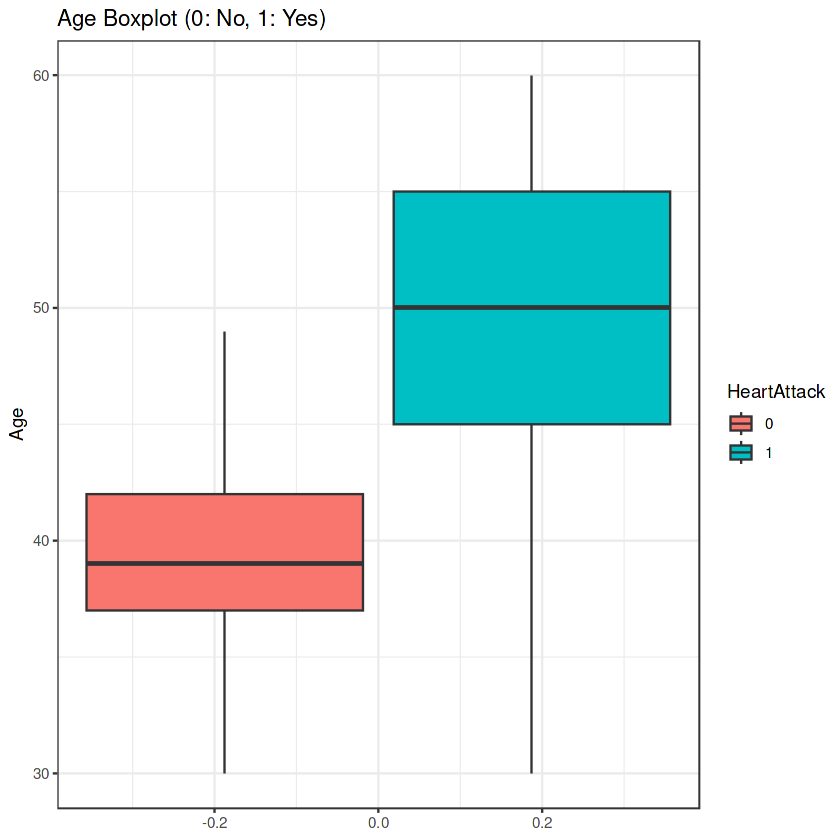

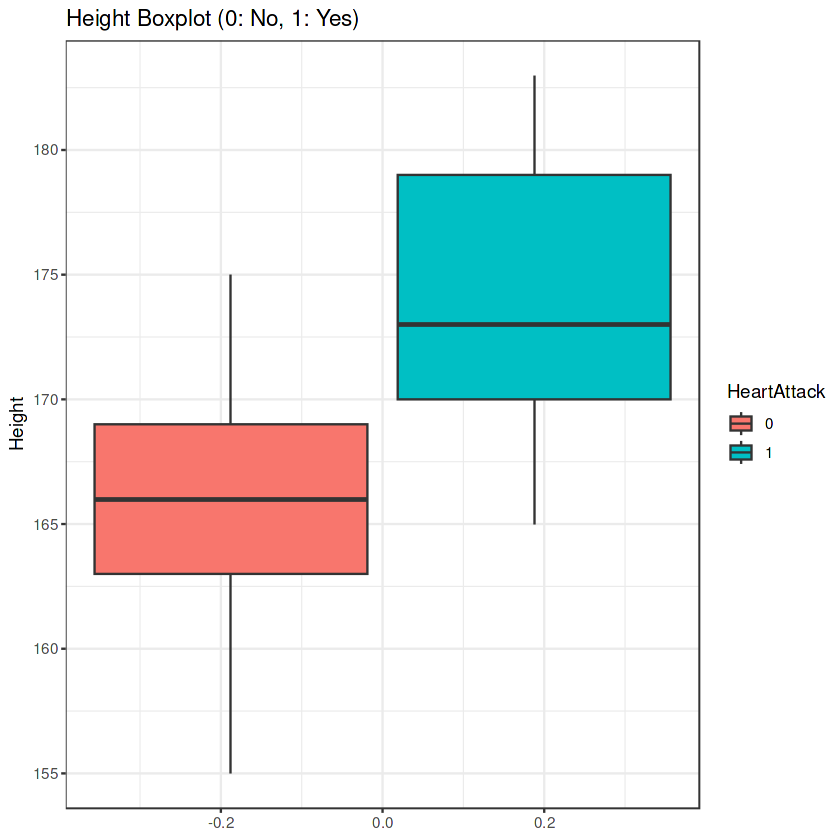

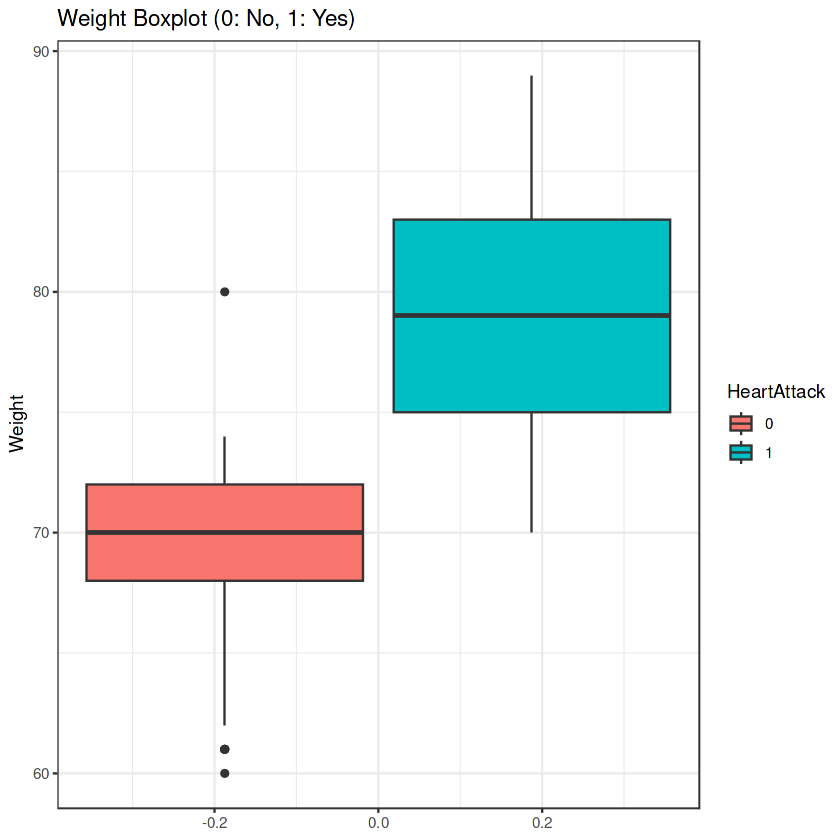

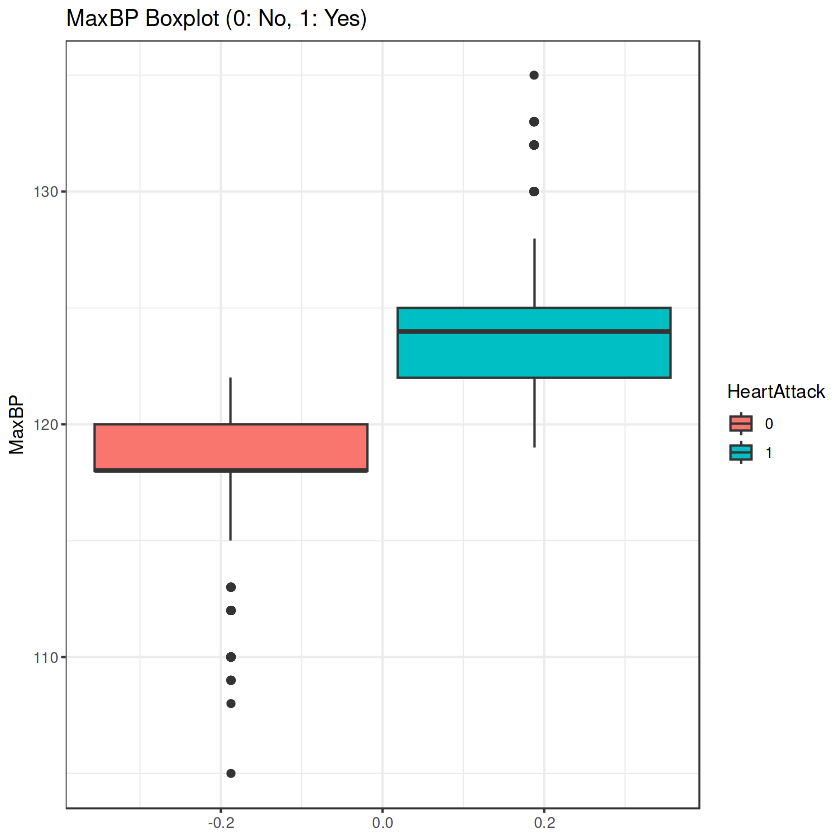

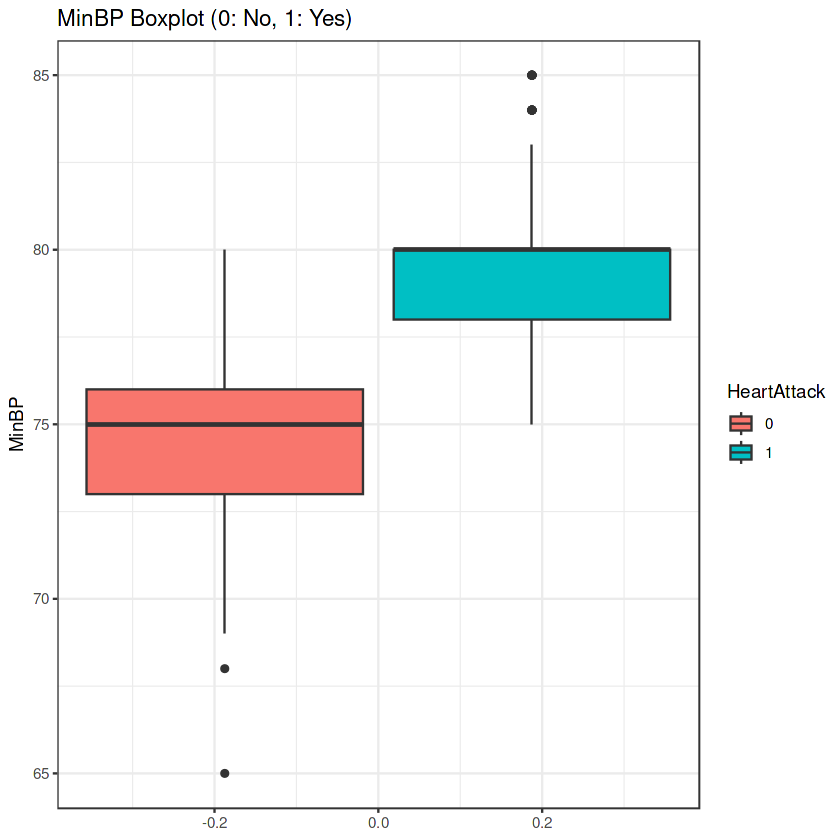

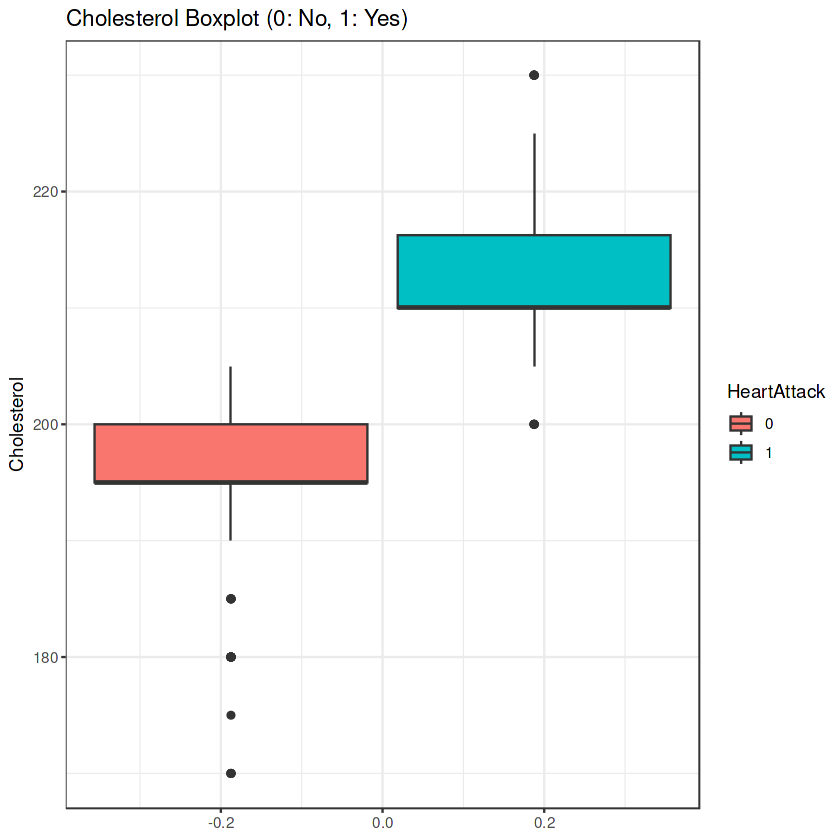

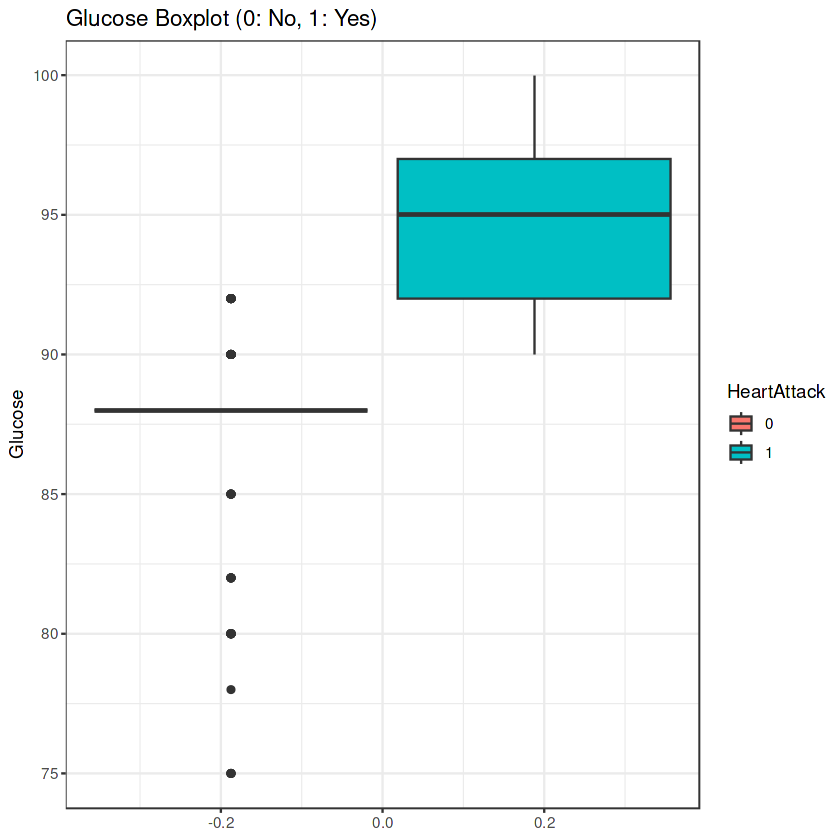

In [867]:
for (i in num_cols){
    print(ggplot(data, aes(y= data[,i], fill = factor(HeartAttack))) + geom_boxplot() + ylab(i) + theme_bw() +
          ggtitle(paste0(i, ' Boxplot (0: No, 1: Yes)')) + labs(fill = 'HeartAttack'))
}

-----------

**The group who said yes for heart attack is higher than the group who said they were not age, height, weight, MaxBP, MinBP, cholesterol, and glucose levels.**

**There is no difference between the groups divided by Smoker and Gender.**

--------------

**cat_cols aggregation**

In [868]:
cat_cols <- c('Smoker','ExerciseTime','HeartAttack')

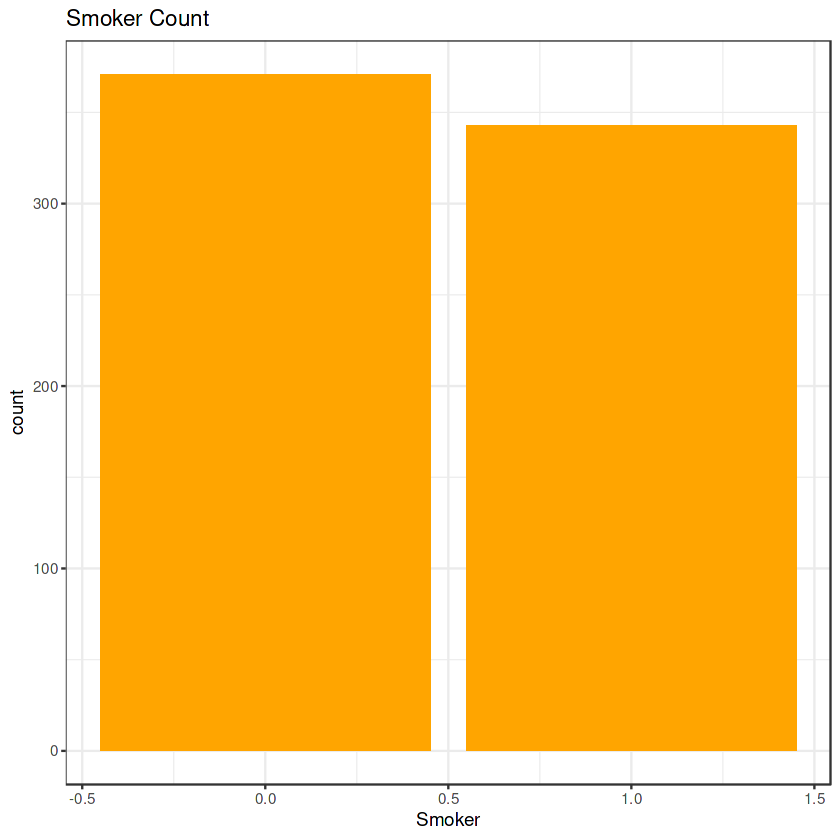

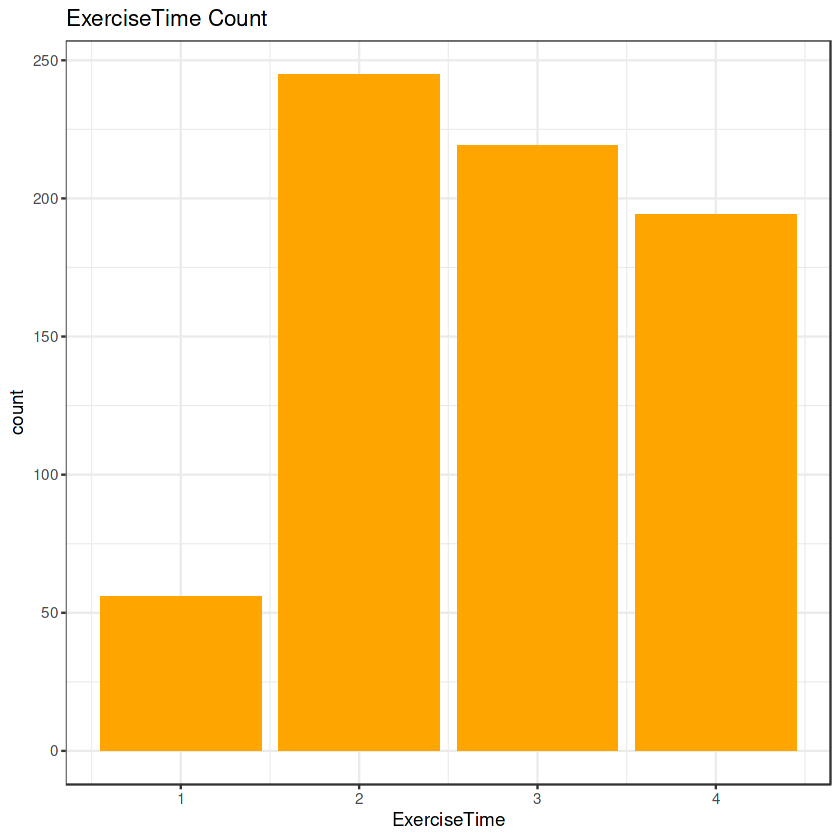

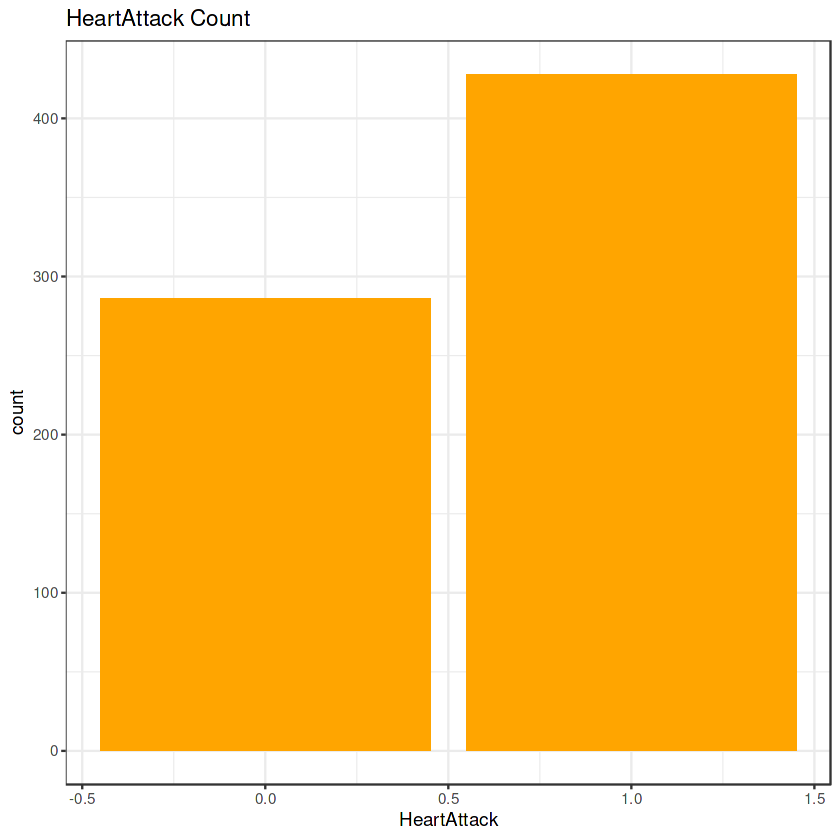

In [869]:
for (i in cat_cols){
    print(ggplot(data, aes(x= data[,i])) + geom_bar(fill = 'orange') + xlab(i) + theme_bw() + ggtitle(paste0(i , ' Count')))
}

---------------

**HeartAttack exploration**

In [870]:
ha_avg_age <- data %>% group_by(HeartAttack) %>% summarize(avg_age = mean(Age,na.rm=T))

In [871]:
ha_avg_age

HeartAttack,avg_age
<int>,<dbl>
0,38.69231
1,48.90421


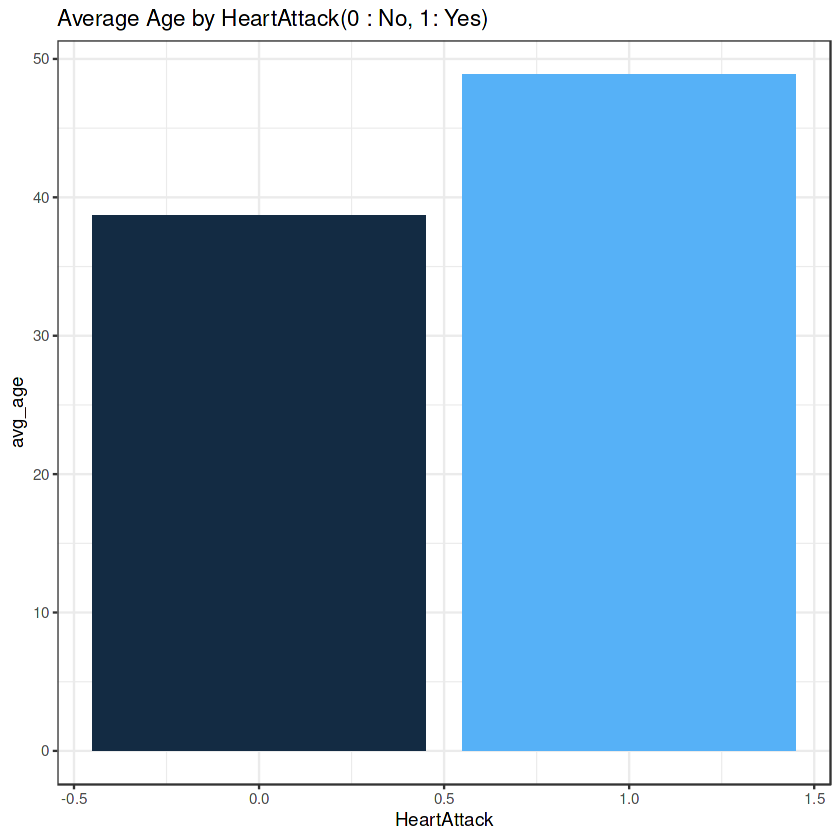

In [872]:
ggplot(ha_avg_age, aes(x = HeartAttack , y= avg_age, fill= HeartAttack)) + geom_col() + theme_bw() + ggtitle('Average Age by HeartAttack(0 : No, 1: Yes)') + theme(legend.position = 'none')

In [873]:
ha_avg_Cholesterol <- data %>% group_by(HeartAttack) %>% summarize(avg_chol = mean(Cholesterol,na.rm=T))

In [874]:
ha_avg_Cholesterol

HeartAttack,avg_chol
<int>,<dbl>
0,194.6503
1,213.5748


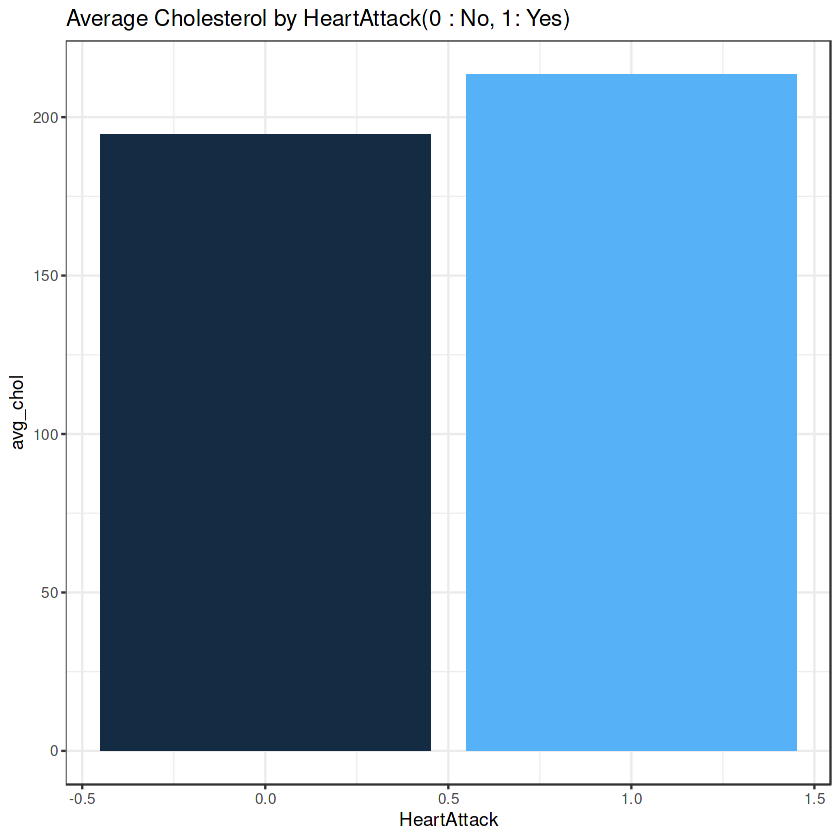

In [875]:
ggplot(ha_avg_Cholesterol, aes(x = HeartAttack , y= avg_chol, fill= HeartAttack)) + geom_col() + theme_bw() + ggtitle('Average Cholesterol by HeartAttack(0 : No, 1: Yes)') + theme(legend.position = 'none')

In [876]:
ha_avg_Glucose <- data %>% group_by(HeartAttack) %>% summarize(avg_Glucose = mean(Glucose,na.rm=T))

In [877]:
ha_avg_Glucose

HeartAttack,avg_Glucose
<int>,<dbl>
0,87.63636
1,95.17290


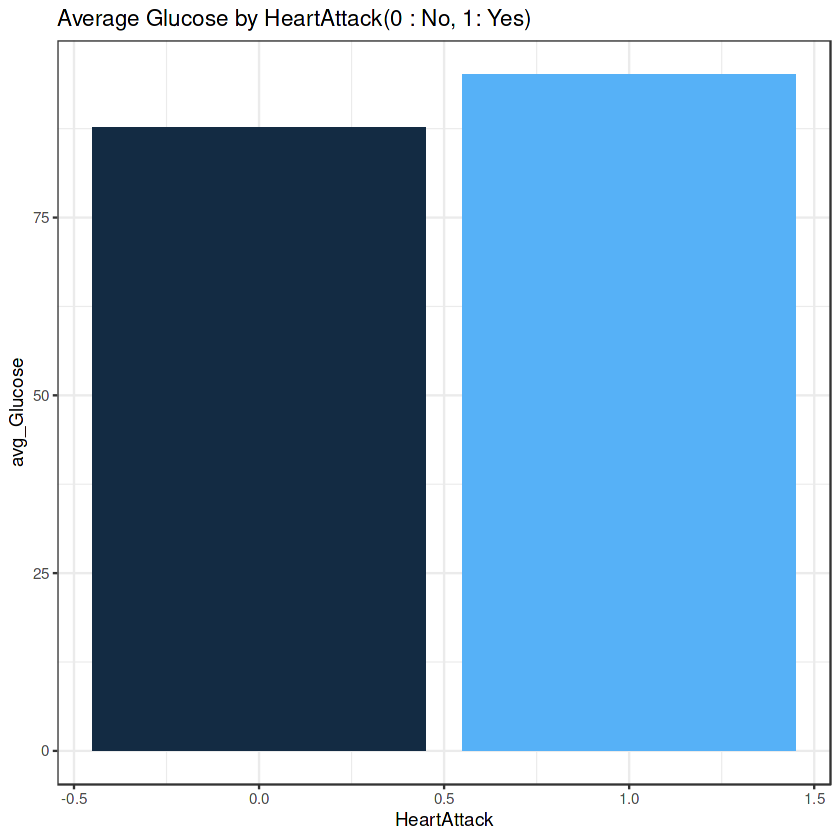

In [878]:
ggplot(ha_avg_Glucose, aes(x = HeartAttack , y= avg_Glucose, fill= HeartAttack)) + geom_col() + theme_bw() + ggtitle('Average Glucose by HeartAttack(0 : No, 1: Yes)') + theme(legend.position = 'none')

-----------

**Correlation**

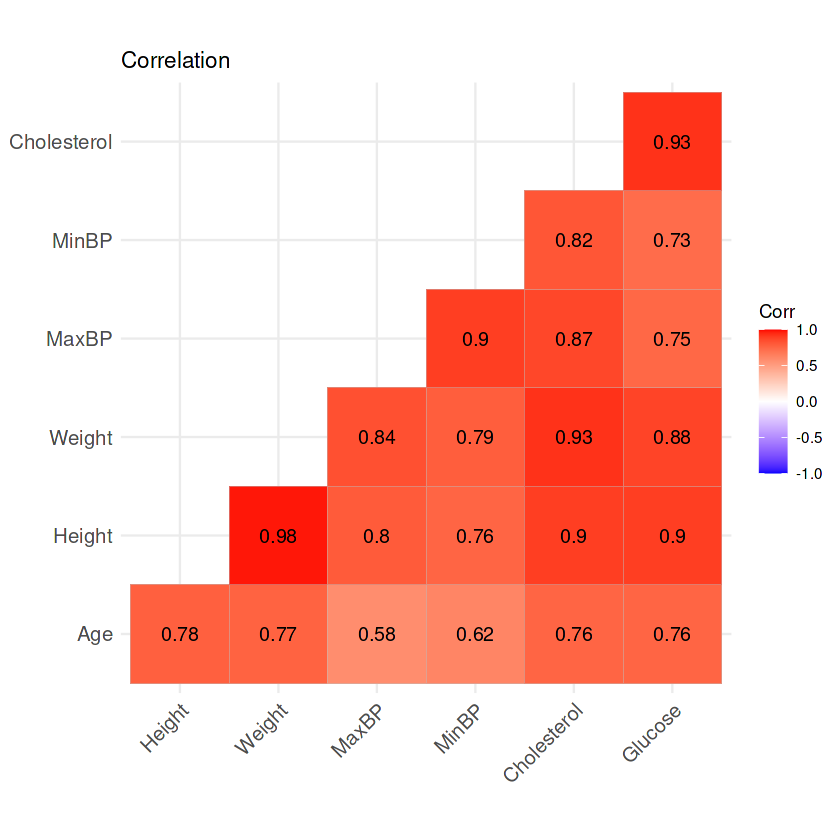

In [879]:
ggcorrplot(cor(data[,num_cols]) , type = "lower", lab=T, title = 'Correlation')

--------------

# **4. Modeling**

In [880]:
library(randomForest)
library(caret)

In [881]:
data$HeartAttack <- as.factor(data$HeartAttack)

In [882]:
idx <- sample(1:nrow(data),nrow(data)* 0.7)
train <- data[idx,-c(2,7)]
test <- data[-idx,-c(2,7)]

-------------

**RandomForest**

In [883]:
md_RF <-  randomForest(HeartAttack~., data = train, ntree=300)

In [884]:
pred_rf <- predict(md_RF,test)

In [885]:
confusionMatrix(pred_rf, reference = test$HeartAttack)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  84   1
         1   0 130
                                          
               Accuracy : 0.9953          
                 95% CI : (0.9744, 0.9999)
    No Information Rate : 0.6093          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9903          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9924          
         Pos Pred Value : 0.9882          
         Neg Pred Value : 1.0000          
             Prevalence : 0.3907          
         Detection Rate : 0.3907          
   Detection Prevalence : 0.3953          
      Balanced Accuracy : 0.9962          
                                          
       'Positive' Class : 0               
                              

**Accuracy : 0.9953**

----------

**Thankyou. Please leave your advice in the comments**